In [2]:
import lhapdf
#import ROOT
import math
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq18 = lhapdf.mkPDF("CT18qed",0)
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)
#JAM21_PDF = lhapdf.mkPDF("JAM21PionPDFnlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/CT18qed/CT18qed_0000.dat
CT18qed PDF set, member #0, version 1
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


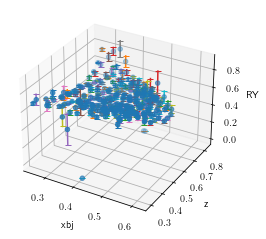

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
df = pd.read_csv('results/forshuo.txt',header=None,delimiter=r"\s+")
df.columns = ["kin", "iz", "x", "Q2","W","z","Wp2","RY","RY_err","HovDp","HovDperr","HovDm","HovDmerr"]

df.describe()

xs = df['x']
zs = df['z']
RYs = df['RY']
RY_err = df['RY_err']
#ax.errorbar(xs,zs,RDs,RD_err,marker = "_")
for i in range(0,len(xs)):
    xbj_corr = xs[i]
    z_corr = zs[i]
    RY = RYs[i]
    RY_error = RY_err[i]
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_")
ax.scatter(xs,zs,RYs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RY")
plt.show()
#plt.savefig("RD_xbj_z")


In [4]:
#df[df['Q2'] == 4.75].head()
df.describe()
#df.head()

,kin,iz,x,Q2,W,z,Wp2,RY,RY_err,HovDp,HovDperr,HovDm,HovDmerr
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,15.320000,11.353333,0.435077,4.435200,2.591433,0.544267,3.373150,0.622393,0.021120,0.628787,0.017350,0.299970,0.011463
std,9.393529,2.870998,0.085627,0.743749,0.278278,0.140185,1.096767,0.088520,0.020964,0.583840,0.026307,0.287516,0.027396
min,1.000000,6.000000,0.249000,2.661000,2.080000,0.292000,2.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,9.000000,0.369750,3.930250,2.396750,0.427000,2.495250,0.585750,0.011000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,11.000000,0.445000,4.353000,2.567500,0.527000,3.119000,0.622000,0.015500,1.077000,0.010000,0.477500,0.006000
75%,23.250000,14.000000,0.499250,4.981000,2.726250,0.673000,3.938250,0.665000,0.023000,1.162750,0.025000,0.553000,0.013000
max,32.000000,17.000000,0.619000,5.795000,3.360000,0.824000,7.640000,0.832000,0.173000,1.328000,0.220000,1.149000,0.349000


In [5]:
df = df[df['W']>2][df['Wp2']>2.8]
df.describe()

,kin,iz,x,Q2,W,z,Wp2,RY,RY_err,HovDp,HovDperr,HovDm,HovDmerr
count,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,14.137566,9.830688,0.417820,4.347291,2.65136,0.469788,3.961757,0.645672,0.018868,0.679275,0.016085,0.330016,0.009894
std,9.393984,2.236760,0.084522,0.732812,0.28860,0.108359,0.970135,0.073269,0.019227,0.573689,0.024312,0.287192,0.017620
min,1.000000,6.000000,0.249000,2.661000,2.10900,0.292000,2.805000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,0.348000,3.792000,2.44200,0.381000,3.216000,0.605000,0.011000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,10.000000,0.419000,4.275000,2.61100,0.475000,3.764000,0.642000,0.014000,1.100000,0.011000,0.511000,0.007000
75%,22.000000,11.000000,0.482000,4.943000,2.80000,0.529000,4.421000,0.682000,0.021000,1.162000,0.022000,0.573000,0.013000
max,32.000000,16.000000,0.609000,5.784000,3.36000,0.775000,7.640000,0.832000,0.173000,1.328000,0.220000,0.851000,0.164000


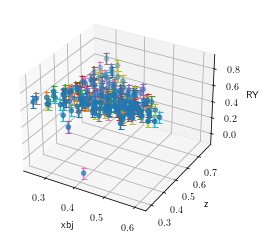

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = []
zs = []
RYs = []
for i,row in df.iterrows():
    #Q2corr = row['Q2']
    xbj = row['x']
    xs.append(xbj)
    zhad = row['z']
    zs.append(zhad)
    RY = row['RY']
    RYs.append(RY)
    RY_err = row['RY_err']
    ax.plot([xbj,xbj],[zhad,zhad],[RY+RY_error,RY-RY_error],marker="_")
ax.scatter(xs,zs,RYs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RY")
plt.show()


    

In [7]:
#CSVS_results = []
pdf_sets = []
i_FF = 2
FF_model = ["fDSSLO","fDSSNLO","JAM20","hknsff07_LO","hknsff07_NLO"]
i_PDF = 1
PDF_model = ["cteq6l1","JAM20","cteq18qed"]
i_assumption = '7ass_rho'

In [8]:

inits = (0.31621375387783907,0.9655536623222454,4,-0.5,0.2)
#inits = (0.31621375387783907,1.0602531294347466,0.60029420012617,0.5690151479308769)
#four input
#4
#inits=(0.5837438039662431,-1.1844700435399933,1.6742194710533476,0)
#4.75
#inits=(0.5487693365000776,-1.0881946339773718,1.594995464377801,0)
#5.5
#inits=(0.38322380904636766,-0.47844410509432217,1.115729075281362,0)
a_rho = -1.6
#rho_file = open("rho_sub_kai2.txt","a")
#rho_file.write("\n")
#rho_file.write(str(a_rho))
#rho_file.write(" ")

In [9]:
def Get_weighted(values,errs):
    sums = 0
    sig = 0
    for i in range(len(values)):
        for j in range(len(errs)):
            sums+=values[i]/(errs[i]*errs[i])
            sig+=1/(errs[i]*errs[i])
    return sums/sig   
def Get_weighted_average(value,error):
    sum_mean = 0
    sum_sigma = 0
    for i in range(len(value)):
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma
def Get_weighted_sigma(value,error):
    sum_sigma = 0
    for i in range(len(value)):
        sum_sigma += 1/(error[i]*error[i])
    return math.sqrt(1/sum_sigma)
def Get_RD_from_RY(RY,RY_err):
    RD = (4*RY-1)/(1-RY)
    RD_err = 3*RY_err/(1-RY)**2
    return RD,RD_err

i_FF = 2
FF_model = ["fDSSLO","fDSSNLO","JAM20","hknsff07_LO","hknsff07_NLO","myDz"]
i_PDF = 1
PDF_model = ["cteq6l1","JAM20","cteq18qed"]



In [ ]:
from iminuit import Minuit
import scipy.integrate as integrate
import scipy.special as sc
import sys
sys.path.insert(1,'DSS')
import fDSS_
sys.path.insert(1,'hkns07fflib-v1_2')
import hknsff07_
def Deltaz_param(z_had,alpha,beta):
    delta_z = z_had**alpha*(1-z_had)**beta
    return delta_z
def Dz_param(z_had,alpha,beta):
    delta_z = z_had**alpha*(1-z_had)**beta
    return (1-delta_z)/(1+delta_z)
    #return params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
def CSVx_param(xbj,a,b,d): 
    #B(x,y) = int_0^1 t**(x-1)(1-t)**(y-1)
    #c = int_0^1 (1-x)**a*x**(b+1)/(1-x)**a*x**b dx
    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
    CSVx = d*(1-xbj)**a*xbj**b*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
    #return params[len(params)-1]
def Bxz_param(Q,z_had,xbj,i_pdf,i_ff):
    duplus = 0
    duminus = 0
    dsplus = 0
    dsminus = 0
    delta_z = 0
    if i_ff==0:
        duplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus 
    elif i_ff==1:
        duplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus
        #return (1-delta_z)/(1+delta_z)
    elif i_ff==2:
        duplus = JAM20.xfxQ(2,z_had,Q)
        duminus = JAM20.xfxQ(-2,z_had,Q)
        dsplus = JAM20.xfxQ(3,z_had,Q)
        dsminus = JAM20.xfxQ(-3,z_had,Q)
        delta_z = duminus/duplus
    elif i_ff==3:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    elif i_ff==4:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    ubar = 0
    dbar = 0
    uv = 0
    dv = 0
    strange = 0
    sbar = 0
    if i_pdf == 0:
        ubar = p_cteq6.xfxQ(-2,xbj,Q)
        dbar = p_cteq6.xfxQ(-1,xbj,Q)
        uv = p_cteq6.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq6.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq6.xfxQ(3,xbj,Q)
        sbar = p_cteq6.xfxQ(-3,xbj,Q)
    elif i_pdf == 1:
        ubar = JAM20_PDF.xfxQ(-2,xbj,Q)
        dbar = JAM20_PDF.xfxQ(-1,xbj,Q)
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-ubar
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-dbar
        strange = JAM20_PDF.xfxQ(3,xbj,Q)
        sbar = JAM20_PDF.xfxQ(-3,xbj,Q)
    elif i_pdf == 2:
        ubar = p_cteq18.xfxQ(-2,xbj,Q)
        dbar = p_cteq18.xfxQ(-1,xbj,Q)
        uv = p_cteq18.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq18.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq18.xfxQ(3,xbj,Q)
        sbar = p_cteq18.xfxQ(-3,xbj,Q)
    B_NS = 5*(ubar+dbar)/(uv+dv)
    B_sz = (dsplus+dsminus)/duplus/(1+delta_z) 
    B_S = B_sz*(strange+sbar)/(uv+dv)
    return 5/2+B_NS+B_S
def Ax_param(Q,xbj,i_pdf):
    uv = 0
    dv = 0
    if i_pdf == 0:
        uv = p_cteq6.xfxQ(2,xbj,Q)-p_cteq6.xfxQ(-2,xbj,Q)
        dv = p_cteq6.xfxQ(1,xbj,Q)-p_cteq6.xfxQ(-1,xbj,Q)
    elif i_pdf == 1:
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-JAM20_PDF.xfxQ(-2,xbj,Q)
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-JAM20_PDF.xfxQ(-1,xbj,Q)
    elif i_pdf ==2:
        uv = p_cteq18.xfxQ(2,xbj,Q)-p_cteq18.xfxQ(-2,xbj,Q)
        dv = p_cteq18.xfxQ(1,xbj,Q)-p_cteq18.xfxQ(-1,xbj,Q)
    return -4/(3*(uv+dv))
def dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,a):
    neg_yield = neg_D2_yield+a*neg_rho_yield
    pos_yield = pos_D2_yield+a*neg_rho_yield
    RY = neg_D2_yield/pos_D2_yield
    RY_rho = neg_yield/pos_yield
    RD = (4*RY-1)/(1-RY)
    RD_rho = (4*RY_rho-1)/(1-RY_rho)
    return RD-RD_rho

def RDmeas_CSV_norho(Q,z_had,xbj,alpha,beta,a,b,d,i_pdf,i_ff):
    
    Dz = Dz_param(z_had,alpha,beta)
    CSVx = CSVx_param(xbj,a,b,d)
    
    Bx = Bxz_param(Q,z_had,xbj,i_pdf,i_ff)
    Ax = Ax_param(Q,xbj,i_pdf)
    return (Bx-Ax*CSVx)/Dz-2.5

In [ ]:
Qs = []
parameters = []
param_errs = []
kaisquare = []

def least_squares_Q2(alpha,beta,a,b,d):
    least_square = 0
    for i,row in df.iterrows():
        Q2corr = row['Q2']
        xbj = row['x']
        zhad = row['z']
        RY = row['RY']
        RY_err = row['RY_err']
        #print(RY,RY_err)
        RD = Get_RD_from_RY(RY,RY_err)[0]
        RD_err = Get_RD_from_RY(RY,RY_err)[1]
        #print(RD_err)
        Qcorr = math.sqrt(Q2corr)
        if RD_err!=0:
            least_square+=((RD-RDmeas_CSV_norho(Qcorr,zhad,xbj,alpha,beta,a,b,d,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
m_Q2 = Minuit(least_squares_Q2,alpha = inits[0],beta = inits[1],a= inits[2],b = inits[3],d = inits[4])
m_Q2.fixed['a'] = True
m_Q2.fixed['b'] = True
#m_Q2.limits['a'] = (0,3)
#m_Q2.limits['b'] = (-0.9,0.5)
#m_Q2.limits['d'] = (-0.5,0.5)
m_Q2.errordef = Minuit.LEAST_SQUARES
m_Q2.migrad()
m_Q2.hesse()
print(*m_Q2.values)
#print(m_Q2.values["a"])
params = m_Q2.values
parameters.append(m_Q2.values)
param_errs.append(m_Q2.errors)
#print(m_Q2.values["a"])
print(len(df)) 
#print(m_Q2.values)
#print(m_Q2.errors)
print(m_Q2.fval)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(df) - m_Q2.nfit}",
]
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
print(fit_info)

dfrhoallout = pd.DataFrame()
for i,row in df.iterrows():
    Q2corr = row['Q2']
    xbj = row['x']
    zhad = row['z']
    RY = row['RY']
    RY_err = row['RY_err']
    RD = Get_RD_from_RY(RY,RY_err)[0]
    RD_err = Get_RD_from_RY(RY,RY_err)[1]
    Qcorr = math.sqrt(Q2corr)
    residual = (RD-RDmeas_CSV_norho(Qcorr,zhad,xbj,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],m_Q2.values[4],i_PDF,i_FF))/RD_err
    #(RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF))/RD_err
    #print(residual)
    row['y_RD'] = RD
    row['error_RD'] = RD_err
    row['Residual_Arho']=(residual)
    dfrhoallout = dfrhoallout.append(row)
   

dfrhoallout.to_csv('results/csv_rho_all_out.csv',index = False)



In [ ]:
print(m_Q2.covariance)
print(m_Q2.values)

In [ ]:
#dont

zhad_fit = np.arange(0.3,0.75,0.01)
from iminuit.util import propagate
def Deltaz_param(z_had,params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return delta_z
def D_z_from_deltaz(deltaz,deltaz_err):
    D_z = (1-deltaz)/(1+deltaz)
    D_zerr = (2*deltaz_err)/(1+deltaz)**2
    return D_z,D_zerr
Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
D_z_all = D_z_from_deltaz(Deltaz_all,Deltaz_err_prop_all)
plt.plot(zhad_fit,D_z_all[0],lw = 3,label = r"$D(z)$")
plt.fill_between(zhad_fit,D_z_all[0]-D_z_all[1],D_z_all[0]+D_z_all[1],alpha = 0.15)

Q = 2
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Deltaz = []
DSS_LO = []
DSS_NLO = []
HKNSFF07_LO = []
HKNSFF07_NLO = []
z_axis = np.arange(0.3,0.75,0.01)
for zi in z_axis:
    dup = JAM20.xfxQ(2,zi,Q)
    dum = JAM20.xfxQ(-2,zi,Q)
    #print(dup,' ',dum)
    JAM20_Deltaz.append(dum/dup)
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,Q*Q)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,Q*Q)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])
    ff = np.zeros(11)
    grad = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,1,ff,grad)
    ff_minus = np.zeros(11)
    grad_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,2,ff_minus,grad_minus)
    duplus = zi*ff[6]
    duminus = zi*ff_minus[6]
    HKNSFF07_LO.append(duminus/duplus)
    ff_NLO = np.zeros(11)
    grad_NLO = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,1,ff_NLO,grad_NLO)
    ff_NLO_minus = np.zeros(11)
    grad_NLO_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,2,ff_NLO_minus,grad_NLO_minus)
    duplus_NLO = zi*ff_NLO[6]
    duminus_NLO = zi*ff_NLO_minus[6]
    HKNSFF07_NLO.append(duminus_NLO/duplus_NLO)

plt.plot(z_axis,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
plt.plot(z_axis,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_LO))/(1+np.asarray(HKNSFF07_LO)),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_NLO))/(1+np.asarray(HKNSFF07_NLO)),linestyle='dashed',label = r'$HKNSFF07 NLO$')





plt.legend()
plt.savefig("results/Dz_err_7rhoall.pdf")

#print(D_z_all[1])

In [ ]:
#def CSVx_param(xbj,a,b):
#    #a = -0.5 
#    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
#    CSVx = (1-xbj)**a*xbj**b*(xbj-c)
xbj_fit = np.arange(0.25,0.7,0.01)
def CSVx_param(xbj,params):
    
    a = params[2]
    b = params[3]
    d = params[4]
    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
    CSVx = d*(1-xbj)**a*xbj**b*(xbj-c)
    #CSVx = params[2]*(1-xbj)**a*xbj**params[3]*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
CSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")
CSVx_err_prop_all = np.diag(CSVcov_all)**0.5
plt.fill_between(xbj_fit,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)



def delta_udv(parameter):
    x = np.arange(0.25,0.7,0.01)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)

x_axis = np.arange(0.25,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')

#plt.xlim(0.25,0.7)
#plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")

plt.savefig("results/CSV_err_7rhoall.pdf")

In [ ]:
Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(zhad_fit,Deltaz_all,lw = 3,label = r"$\Delta(z)$")
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
plt.fill_between(zhad_fit,Deltaz_all-Deltaz_err_prop_all,Deltaz_all+Deltaz_err_prop_all,alpha = 0.15)

plt.plot(z_axis,np.asarray(JAM20_Deltaz),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.plot(z_axis,np.asarray(DSS_LO),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,np.asarray(DSS_NLO),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,np.asarray(HKNSFF07_LO),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,np.asarray(HKNSFF07_NLO),linestyle='dashed',label = r'$HKNSFF07 NLO$')
plt.legend()
plt.savefig("results/Deltaz_err_7rhoall.pdf")

In [ ]:
import scipy.integrate as integrate
print(integrate.quad(CSVx_param,0,1,m_Q2.values))



In [ ]:
#a = parameters[0][3]
#b = parameters[0][2]
#c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
#a = 4
#b = -1.2
a = m_Q2.values[2]
b = m_Q2.values[3]
d = m_Q2.values[4]
c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
print(c)

In [ ]:

def MRST_CSV(x,k):
    return 2*k*(1-x)**4*x**-0.5*(x-0.0909)




In [ ]:
xbj_all = np.arange(0,1,0.01)
def CSVx_param(xbj,params):
    a = params[2]
    #a = -0.5
    b = params[3]
    d = params[4]
    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
    CSVx = d*(1-xbj)**a*xbj**b*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
CSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_all, p), m_Q2.values, m_Q2.covariance)
plt.plot(xbj_all,CSVx_all,lw = 3,label = r"$CSV(x)$")
CSVx_err_prop_all = np.diag(CSVcov_all)**0.5
plt.fill_between(xbj_all,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)

#plt.xlim(0.25,0.75)